In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats.mstats import winsorize
import warnings

title_style = {'family': 'Century Gothic', 'color': 'darkred', 'size': 20 }
axis_style  = {'family': 'Century Gothic', 'color': 'darkblue', 'size': 15 }

warnings.filterwarnings('ignore')

In [302]:
states=pd.read_csv("D:\Data_Science\Veri_Bilimi_Bootcamp\odevler\states_all.csv")
states.columns

Index(['PRIMARY_KEY', 'STATE', 'YEAR', 'ENROLL', 'TOTAL_REVENUE',
       'FEDERAL_REVENUE', 'STATE_REVENUE', 'LOCAL_REVENUE',
       'TOTAL_EXPENDITURE', 'INSTRUCTION_EXPENDITURE',
       'SUPPORT_SERVICES_EXPENDITURE', 'OTHER_EXPENDITURE',
       'CAPITAL_OUTLAY_EXPENDITURE', 'GRADES_PK_G', 'GRADES_KG_G',
       'GRADES_4_G', 'GRADES_8_G', 'GRADES_12_G', 'GRADES_1_8_G',
       'GRADES_9_12_G', 'GRADES_ALL_G', 'AVG_MATH_4_SCORE', 'AVG_MATH_8_SCORE',
       'AVG_READING_4_SCORE', 'AVG_READING_8_SCORE'],
      dtype='object')

In [303]:
df = states.copy()
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


Tek değişkenli analiz yaparak verileri yorumlayın, önemli gördüğünüz noktaları belirtin.

# Soru:1 

## Önmeli Nokta: Eksik değerleri dolduralım

In [304]:
print("TOTAL_REVENUE için yüzde eksik değerler: {} ".format(df["TOTAL_REVENUE"].isnull().sum()*100/df.shape[0]))
print("TOTAL_EXPENDITURE için yüzde eksik değerler: {} ".format(df["TOTAL_EXPENDITURE"].isnull().sum()*100/df.shape[0]))

TOTAL_REVENUE için yüzde eksik değerler: 25.65597667638484 
TOTAL_EXPENDITURE için yüzde eksik değerler: 25.65597667638484 


In [306]:
for col in ["TOTAL_REVENUE","TOTAL_EXPENDITURE"]:
    df.loc[:, col].fillna(df.loc[:, col].interpolate(), inplace=True)

In [307]:
df[["TOTAL_REVENUE","TOTAL_EXPENDITURE"]]

,TOTAL_REVENUE,TOTAL_EXPENDITURE
0,2678885.0,2653798.0
1,1049591.0,972488.0
2,3258079.0,3401580.0
3,1711959.0,1743022.0
4,26260025.0,27138832.0
...,...,...
1710,2044669.0,2034229.0
1711,2044669.0,2034229.0
1712,2044669.0,2034229.0
1713,2044669.0,2034229.0


In [308]:
print("TOTAL_REVENUE için yüzde eksik değerler: {} ".format(df["TOTAL_REVENUE"].isnull().sum()*100/df.shape[0]))
print("TOTAL_EXPENDITURE için yüzde eksik değerler: {} ".format(df["TOTAL_EXPENDITURE"].isnull().sum()*100/df.shape[0]))

TOTAL_REVENUE için yüzde eksik değerler: 0.0 
TOTAL_EXPENDITURE için yüzde eksik değerler: 0.0 


# Aykırı değer Analizi

<AxesSubplot:>

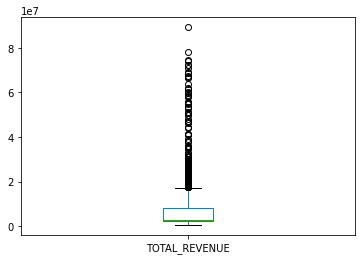

In [309]:
df.TOTAL_REVENUE.plot(kind="box")

<AxesSubplot:>

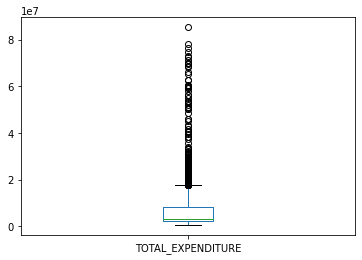

In [310]:
df.TOTAL_EXPENDITURE.plot(kind="box")

In [292]:
df["TOTAL_REVENUE"] = winsorize(df["TOTAL_REVENUE"],(0.05,0.1))
df["TOTAL_EXPENDITURE"] = winsorize(df["TOTAL_EXPENDITURE"], (0.05,0.1))

<AxesSubplot:>

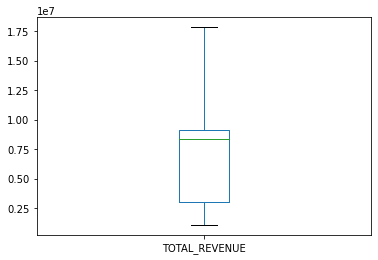

In [293]:
df.TOTAL_REVENUE.plot(kind="box")

<AxesSubplot:>

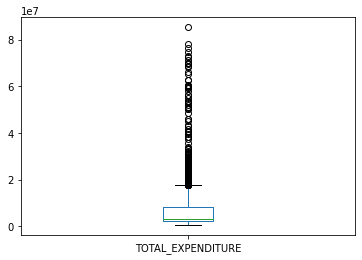

In [311]:
df.TOTAL_EXPENDITURE.plot(kind="box")

In [295]:
df['TOTAL_REVENUE'].describe()

count    1.715000e+03
mean     7.601000e+06
std      5.035282e+06
min      1.062475e+06
25%      2.992297e+06
50%      8.363904e+06
75%      9.102045e+06
max      1.782162e+07
Name: TOTAL_REVENUE, dtype: float64

In [296]:
df['TOTAL_EXPENDITURE'].describe()

count    1.715000e+03
mean     7.626704e+06
std      5.003055e+06
min      1.052315e+06
25%      3.004448e+06
50%      8.488521e+06
75%      9.206242e+06
max      1.766835e+07
Name: TOTAL_EXPENDITURE, dtype: float64

In [329]:
print("--"*500)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Soru: 2

Bir eyaleti ele alın (ör: California) ve toplam gelirleri ile toplam harcamalarının yıllara göre değişiminin doğru grafiğini çizin. Bu iki değişken yıllara göre değişim göstermekte midir? Zirve ve dip yaptığı yıllar var mı?

In [327]:
df2 = df.loc[df["STATE"]=="CALIFORNIA"]
df2 = df2.sort_values("YEAR",ascending=True)
df2 = df2[["YEAR","TOTAL_EXPENDITURE","TOTAL_REVENUE"]]
df2.index = df2["YEAR"]
#df2 = df2[["TOTAL_REVENUE"]]
df2

,YEAR,TOTAL_EXPENDITURE,TOTAL_REVENUE
YEAR,,,
1986,1986,2034229.0,2044669.0
1987,1987,2034229.0,2044669.0
1988,1988,2034229.0,2044669.0
1989,1989,2034229.0,2044669.0
1990,1990,2034229.0,2044669.0
1991,1991,2034229.0,2044669.0
1992,1992,27138832.0,26260025.0
1993,1993,28110986.0,28043338.0
1994,1994,23012688.0,23440845.0


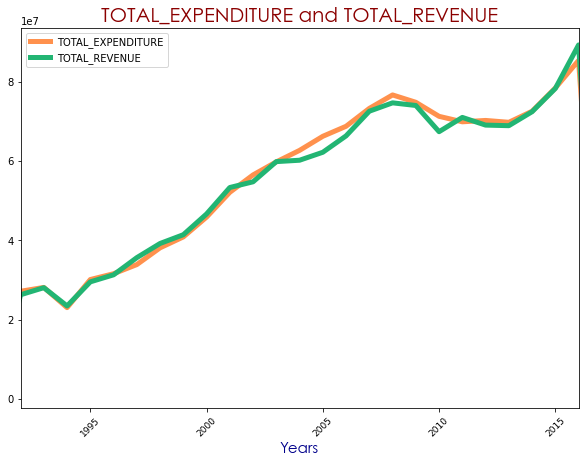

In [328]:
plt.figure(figsize=(10, 7))
plt.title('TOTAL_EXPENDITURE and TOTAL_REVENUE', fontdict = title_style)
plt.xlabel('Years',fontdict = axis_style)
#plt.ylabel('TOTAL_EXPENDITURE')
plt.plot(df2['TOTAL_EXPENDITURE'], c = "#FF914D", lw = 5)
plt.plot(df2['TOTAL_REVENUE'], c = "#22B573", lw = 5)
plt.xticks(rotation = 45, fontsize = 9)
plt.xlim(1992, 2016)
plt.legend(['TOTAL_EXPENDITURE', 'TOTAL_REVENUE'])
plt.show()

Değerlendirme;

1. Bu iki değişken yıllara göre benzerlik göstermektedir.
2. 1994 yılı minimum, 2016 yılı maksimum yerdir.

In [330]:
print("--"*500)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Soru 3

Seçtiğiniz eyalette, öğrenciler hangi derste daha başarılı? Matematik mi yoksa okuma mı?

In [339]:
df3 = df.loc[df["STATE"]=="CALIFORNIA"]
df3 = df3.sort_values("YEAR",ascending=True)
df3 = df3[["YEAR","AVG_MATH_4_SCORE","AVG_MATH_8_SCORE","AVG_READING_4_SCORE","AVG_READING_8_SCORE"]].fillna(0)
df3["Total_Math"] = df3["AVG_MATH_4_SCORE"] + df3["AVG_MATH_8_SCORE"]
df3["Total_Reading"] = df3["AVG_READING_4_SCORE"] + df3["AVG_READING_8_SCORE"]
df3.index = df3["YEAR"]
#df2 = df2[["TOTAL_REVENUE"]]
df3

,YEAR,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,Total_Math,Total_Reading
YEAR,,,,,,,
1986,1986,0.0,0.0,0.0,0.0,0.0,0.0
1987,1987,0.0,0.0,0.0,0.0,0.0,0.0
1988,1988,0.0,0.0,0.0,0.0,0.0,0.0
1989,1989,0.0,0.0,0.0,0.0,0.0,0.0
1990,1990,0.0,256.0,0.0,0.0,256.0,0.0
1991,1991,0.0,0.0,0.0,0.0,0.0,0.0
1992,1992,208.0,261.0,202.0,0.0,469.0,202.0
1993,1993,0.0,0.0,0.0,0.0,0.0,0.0
1994,1994,0.0,0.0,197.0,0.0,0.0,197.0


In [340]:
df3["Total_Math"].sum()

5737.0

In [341]:
df3["Total_Reading"].sum()

5512.0

Matematikte daha başarılılar

In [343]:
print("--"*500)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Soru: 4

Matematik ve okuma notlarının dağılımı nedir?

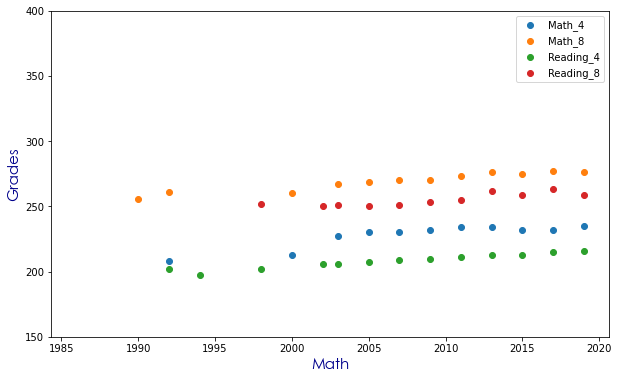

In [357]:
plt.figure(figsize=(10, 6))
#plt.title('Math & Reading")
plt.scatter(df3.YEAR, df3.AVG_MATH_4_SCORE, label = "MATH_4")
plt.scatter(df3.YEAR, df3.AVG_MATH_8_SCORE, label = "MATH_8")
plt.scatter(df3.YEAR, df3.AVG_READING_4_SCORE, label = "READING_4")
plt.scatter(df3.YEAR, df3.AVG_READING_8_SCORE, label = "READING_8")
plt.xlabel('Math',fontdict = axis_style)
plt.ylabel('Grades', fontdict = axis_style)
plt.legend(['Math_4',"Math_8",'Reading_4',"Reading_8"])
plt.ylim(150, 400)
plt.show()

## Eksik değerleri görmek için ylim iptal edilerek tekrar grafik okutulmuştur.

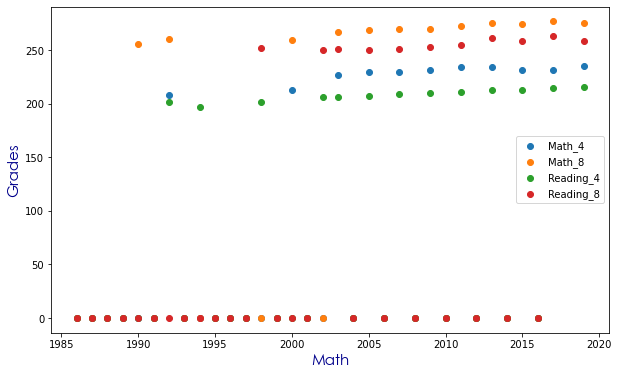

In [360]:
plt.figure(figsize=(10, 6))
#plt.title('Math & Reading")
plt.scatter(df3.YEAR, df3.AVG_MATH_4_SCORE, label = "MATH_4")
plt.scatter(df3.YEAR, df3.AVG_MATH_8_SCORE, label = "MATH_8")
plt.scatter(df3.YEAR, df3.AVG_READING_4_SCORE, label = "READING_4")
plt.scatter(df3.YEAR, df3.AVG_READING_8_SCORE, label = "READING_8")
plt.xlabel('Math',fontdict = axis_style)
plt.ylabel('Grades', fontdict = axis_style)
plt.legend(['Math_4',"Math_8",'Reading_4',"Reading_8"])
#plt.ylim(150, 400)
plt.show()

In [361]:
print("--"*500)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

# Soru: 5

Metematik ve okuma notlarında birçok eksik değer olduğunu farketmişsinizdir. Eksik değerleri ortalama, medyan ve enterpolasyon ile tamamlayın. Bu tekniklerin notların dağılımı üzerindeki etkisini karşılaştırın.

### AVG_MATH_8_SCORE ve AVG_READING_8_SCORE, bu inceleme için seçilmiştir

In [389]:
df4 = df.loc[df["STATE"]=="CALIFORNIA"]
df4 = df4.sort_values("YEAR",ascending=True)
df4 = df4[["YEAR","AVG_MATH_8_SCORE","AVG_READING_8_SCORE"]]
df4.index = df4["YEAR"]
df4

,YEAR,AVG_MATH_8_SCORE,AVG_READING_8_SCORE
YEAR,,,
1986,1986,NaN,NaN
1987,1987,NaN,NaN
1988,1988,NaN,NaN
1989,1989,NaN,NaN
1990,1990,256.0,NaN
1991,1991,NaN,NaN
1992,1992,261.0,NaN
1993,1993,NaN,NaN
1994,1994,NaN,NaN


In [ ]:
plt.figure(figsize=(10, 6))
#plt.title('Math & Reading")
plt.scatter(df3.YEAR, df3.AVG_MATH_4_SCORE, label = "MATH_4")
plt.scatter(df3.YEAR, df3.AVG_MATH_8_SCORE, label = "MATH_8")
plt.scatter(df3.YEAR, df3.AVG_READING_4_SCORE, label = "READING_4")
plt.scatter(df3.YEAR, df3.AVG_READING_8_SCORE, label = "READING_8")
plt.xlabel('Math',fontdict = axis_style)
plt.ylabel('Grades', fontdict = axis_style)
plt.legend(['Math_4',"Math_8",'Reading_4',"Reading_8"])
#plt.ylim(150, 400)
plt.show()

In [376]:
variables = ["AVG_MATH_8_SCORE","AVG_READING_8_SCORE"]

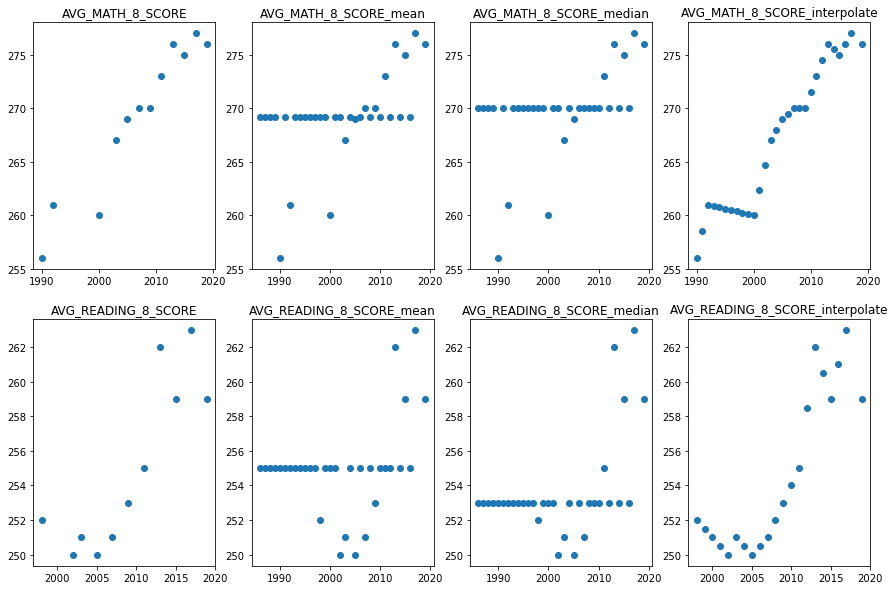

In [393]:
plt.figure(figsize=(15,10))

for i in range(4):
    plt.subplot(2,4,i+1)
    if i == 0:
        plt.scatter(df4.YEAR, df4[variables[0]], label = variables[0])
        plt.title(variables[0])
    if i == 1:
        plt.scatter(df4.YEAR, df4[variables[0]].fillna(df4[variables[0]].mean()), label = variables[0])
        plt.title(variables[0] + "_mean")        
    if i == 2:
        plt.scatter(df4.YEAR, df4[variables[0]].fillna(df4[variables[0]].median()), label = variables[0])
        plt.title(variables[0] + "_median")        
    if i == 3:
        plt.scatter(df4.YEAR, df4[variables[0]].fillna(df4[variables[0]].interpolate()), label = variables[0])
        plt.title(variables[0] + "_interpolate")        
        
for i in range(4):
    plt.subplot(2,4,i+5)
    if i == 0:
        plt.scatter(df4.YEAR, df4[variables[1]], label = variables[1])
        plt.title(variables[1])
    if i == 1:
        plt.scatter(df4.YEAR, df4[variables[1]].fillna(df4[variables[1]].mean()), label = variables[1])
        plt.title(variables[1] + "_mean")        
    if i == 2:
        plt.scatter(df4.YEAR, df4[variables[1]].fillna(df4[variables[1]].median()), label = variables[1])
        plt.title(variables[1] + "_median")        
    if i == 3:
        plt.scatter(df4.YEAR, df4[variables[1]].fillna(df4[variables[1]].interpolate()), label = variables[1])
        plt.title(variables[1] + "_interpolate") 
        
plt.show()

Farklar grafiklerde gözüktüğü gibidir.mean ve median birbirlerine yakın gözükmektedir.